## Plot to analyze ratio of discharge of ALC Patients

Notebook to explore the discharge rate of ALC patients over time. 

For each ALC patient (`df[ALCDays]>0`) I ploted an timeline on when they where discharged. 

Increasing number of ALC Discharges means more beds available 


In [1]:
import yaml
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import numpy as np
import seaborn as sns

In [2]:
with open('../config/paths.yaml', 'r') as file:
    config = yaml.safe_load(file)
for key in config:
    print(f'{key:40} (type: {type(config[key])})')

unified_merged_file_cz                   (type: <class 'str'>)
unified_merged_file_noncz                (type: <class 'str'>)
data_path                                (type: <class 'str'>)
cz_files                                 (type: <class 'list'>)
noncz_files                              (type: <class 'list'>)


In [19]:
df = pd.read_csv(config['unified_merged_file_cz'])
df['is ALC Patient'] = df['ALCDays'] > 0
df['Admit Date:'] = [date.fromisoformat(date_.replace('/','-')) for date_ in df['Admit Date:']]
df['Disch Date:'] = [date.fromisoformat(date_.replace('/','-')) for date_ in df['Disch Date:']]
df['Disch Date (year-month):'] = [str(date_)[:7] for date_ in df['Disch Date:']]
df['Total Days in Hospital'] = [1 if (discharge-admit).days==0 else (discharge-admit).days  for admit,discharge in zip(df['Admit Date:'], df['Disch Date:'])]
df[['Admit Date:', 'Disch Date:', 'Patient Age:', 'ALCDays','Disch Date (year-month):']]

/var/folders/d0/9279s72s163gx0_12qbmr9440000gn/T/ipykernel_2599/1218031301.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(config['unified_merged_file_cz'])


,Admit Date:,Disch Date:,Patient Age:,ALCDays,Disch Date (year-month):
0,2014-12-24,2015-01-01,67,0,2015-01
1,2014-12-30,2015-01-01,38,0,2015-01
2,2014-12-29,2015-01-01,62,0,2015-01
3,2014-12-31,2015-01-01,37,0,2015-01
4,2014-12-29,2015-01-01,49,0,2015-01
...,...,...,...,...,...
256001,2022-07-28,2022-12-28,37,153,2022-12
256002,2022-12-21,2022-12-28,41,0,2022-12
256003,2022-12-22,2022-12-29,43,0,2022-12
256004,2022-12-21,2022-12-30,35,0,2022-12


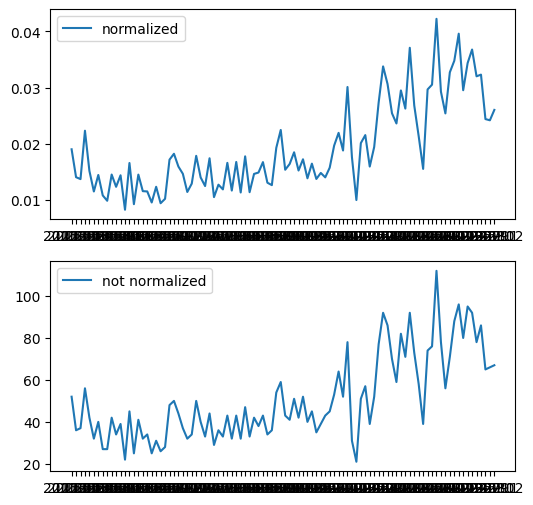

In [62]:
fig, ax = plt.subplots(2,figsize=(6,6))
x=[]
y=[]
y2=[]
for date_ in sorted(set(df['Disch Date (year-month):'])):
    auxdf = df[df['Disch Date (year-month):']==date_]
    count = np.sum(auxdf['ALCDays']>0)
    total = auxdf.shape[0]
    x.append(date_)
    y.append(float(count)/float(total), )
    y2.append(float(count),)


ax[0].plot(x,y, label='normalized')
ax[1].plot(x,y2, label='not normalized')
ax[0].legend()
ax[1].legend()

In [56]:
y[:2]

[0.0190267105744603, 0.0140625]

In [58]:
y2[:2]

[52.0, 36.0]

In [22]:
date.fromisoformat('2011/01/01')

ValueError: Invalid isoformat string: '2011/01/01'

In [20]:
for ix,(alc_days, acute_days, total_days) in enumerate(zip(df['ALCDays'], df['Acute Days'], df['Total Days in Hospital'])):
    assert alc_days+acute_days == total_days, f'{ix}: {alc_days}+{acute_days} == {total_days}'

df[df['ALCDays']>=0][['Admit Date:', 'Disch Date:', 'ALCDays', 'Acute Days', 'Total Days in Hospital']]

,Admit Date:,Disch Date:,ALCDays,Acute Days,Total Days in Hospital
0,2014-12-24,2015-01-01,0,8,8
1,2014-12-30,2015-01-01,0,2,2
2,2014-12-29,2015-01-01,0,3,3
3,2014-12-31,2015-01-01,0,1,1
4,2014-12-29,2015-01-01,0,3,3
...,...,...,...,...,...
256001,2022-07-28,2022-12-28,153,0,153
256002,2022-12-21,2022-12-28,0,7,7
256003,2022-12-22,2022-12-29,0,7,7
256004,2022-12-21,2022-12-30,0,9,9


In [18]:
df.iloc[16]

Institution Number:                                                        65
Coded HCN                                                           4584715.0
Admit Date:                                                        2015-01-02
Disch Date:                                                        2015-01-02
Readmission Code:                        5 New patient to the acute care unit
Patient Age:                                                               39
Gender:                                                                Female
MRDx                                 C73  Malignant neoplasm of thyroid gland
Postal Code:                                                           B2W0H9
Diagnosis:                                                    ['C73', 'E063']
Diagnosis Long Text         ['Malignant neoplasm of thyroid gland', 'Autoi...
Diagnosis Type                                                     ['M', '3']
Intervention Code                                               

In [9]:
delta_.days

8